# Tabular Methods

In this assignment, you will solve the FrozenLake-v0 environment from OpenAI gym using 
* Value Iteration 
* Policy Iteration 
* Tabular Q learning 

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.The surface is described using a grid like the following 

        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    
The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

source: https://gym.openai.com/envs/FrozenLake-v0/  

## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic
* The environment consists of 16 states. (env.nS: count of state (int))
* The agent can take 4 actions (env.nA: count of action (int))
* The transition kernel P is a dictionary. 
* P[state][action] is tuples with (probability, nextstate, reward, terminal)
* **Use the following code snippet to set up the gym environemnt for all the questions**

In [ ]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma = 0.9

In [ ]:
#Obtaining environment details 
print('Number of Actions', env.nA) 
print('Number of States ', env.nS)
print('P[10,3]', env.P[10][3])

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 11, 0.0, True), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 9, 0.0, False)]


## Generating a Heatmap 
* Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy. 
* This function also prints the value function and policy. 

Value Function [0.95356416 0.80270265 0.49963159 0.82453958 0.76356411 0.90855028
 0.49024644 0.10983356 0.13185794 0.82714018 0.89469482 0.52279358
 0.81000226 0.0027957  0.87636408 0.52013729]
Policy [0 2 2 1 2 2 0 1 2 0 0 1 1 1 2 1]


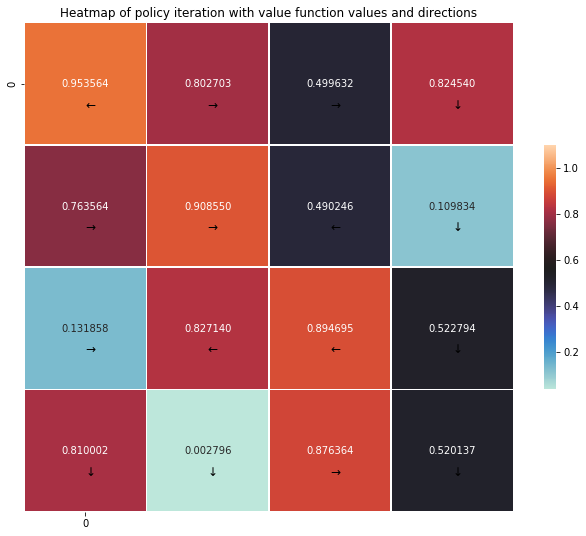

In [ ]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(test_value,test_policy)

# Q Learning 
* Q learning is a model free approach, thus you will not use the transition kernel. 
* You can reset the environment using env.reset()
* env.step(action) takes in action as an argument and gives next state,reward,terminal and info as the output 

In [ ]:
state = env.reset() #Reset the env
max_step = 20 
for step in range(max_step):    
    action = env.action_space.sample() #Random Action
    n_state,reward,terminal,_ = env.step(action) #Take a step 
    print('State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
    state = n_state 
    if terminal:
        break   